In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./data/Train.csv')
df.head()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   1000 non-null   int64
 1   Warehouse_block      1000 non-null   str  
 2   Mode_of_Shipment     1000 non-null   str  
 3   Customer_care_calls  1000 non-null   int64
 4   Customer_rating      1000 non-null   int64
 5   Cost_of_the_Product  1000 non-null   int64
 6   Prior_purchases      1000 non-null   int64
 7   Product_importance   1000 non-null   str  
 8   Gender               1000 non-null   str  
 9   Discount_offered     1000 non-null   int64
 10  Weight_in_gms        1000 non-null   int64
 11  Reached.on.Time_Y.N  1000 non-null   int64
dtypes: int64(8), str(4)
memory usage: 93.9 KB


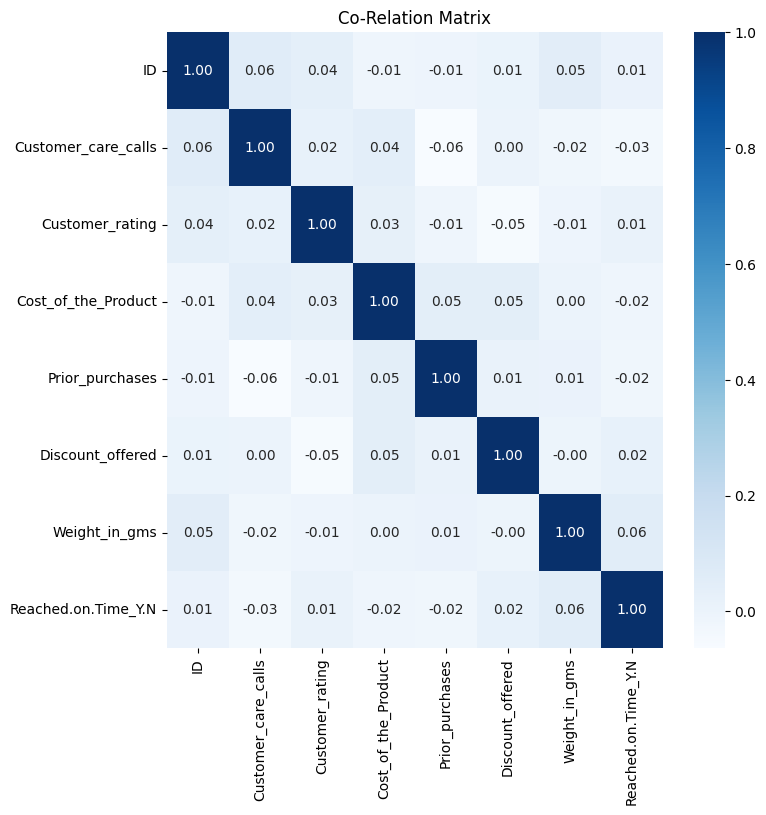

In [2]:
plt.figure(figsize=(8,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),annot = True, cmap = 'Blues',fmt = '.2f')
plt.title("Co-Relation Matrix")
plt.show()

In [3]:
print(df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean())
print("\nOn-Time Delivery by Shipment Mode")
print(df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].sum())
print("Average Cost per Warehouse")
print(df.groupby('Warehouse_block')['Cost_of_the_Product'].mean())

Mode_of_Shipment
Flight    0.459627
Road      0.518841
Ship      0.534535
Name: Reached.on.Time_Y.N, dtype: float64

On-Time Delivery by Shipment Mode
Mode_of_Shipment
Flight    148
Road      179
Ship      178
Name: Reached.on.Time_Y.N, dtype: int64
Average Cost per Warehouse
Warehouse_block
A    202.284264
B    205.344444
C    197.387850
D    201.375587
F    195.765306
Name: Cost_of_the_Product, dtype: float64


In [4]:
df['Cost_per_gram'] = df['Cost_of_the_Product'] / df['Weight_in_gms']
print("Average Cost per gram by Warehouse")
print(df.groupby('Warehouse_block')['Cost_per_gram'].mean())

Average Cost per gram by Warehouse
Warehouse_block
A    0.073977
B    0.075921
C    0.069130
D    0.068667
F    0.068572
Name: Cost_per_gram, dtype: float64


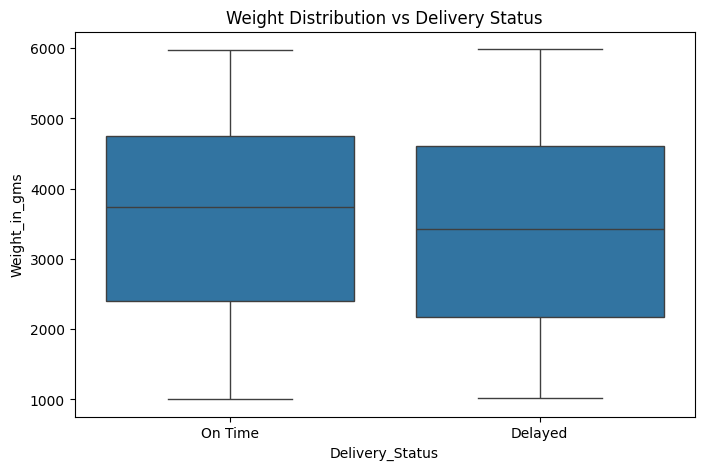

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Delivery_Status', y='Weight_in_gms', data=df)
plt.title("Weight Distribution vs Delivery Status")
plt.show()


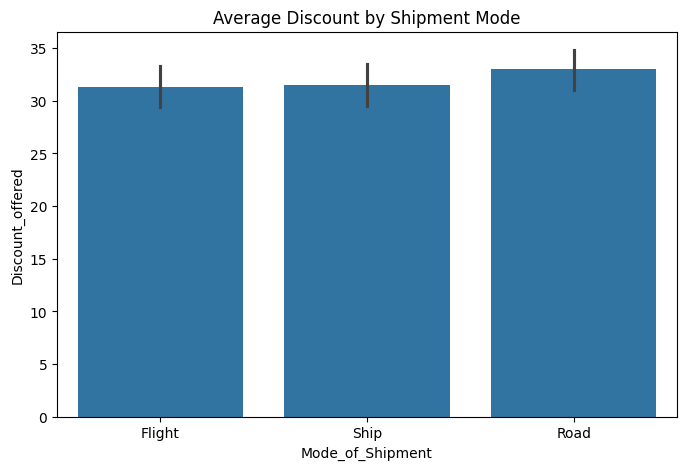

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='Mode_of_Shipment', y='Discount_offered', data=df)
plt.title("Average Discount by Shipment Mode")
plt.show()


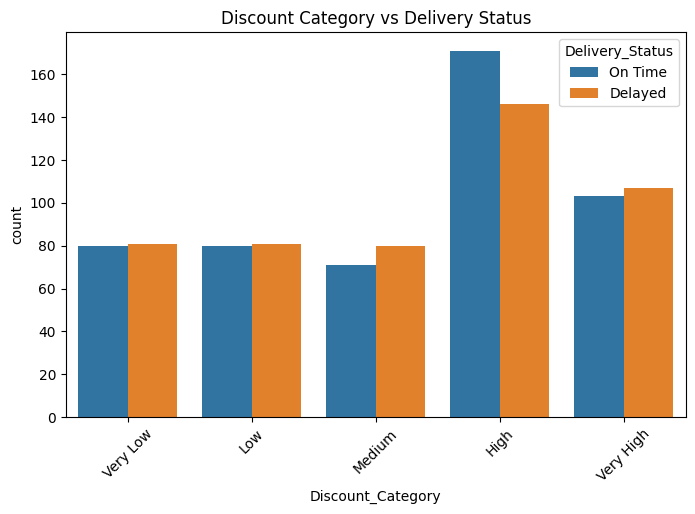

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Discount_Category', hue='Delivery_Status', data=df)
plt.xticks(rotation=45)
plt.title("Discount Category vs Delivery Status")
plt.show()


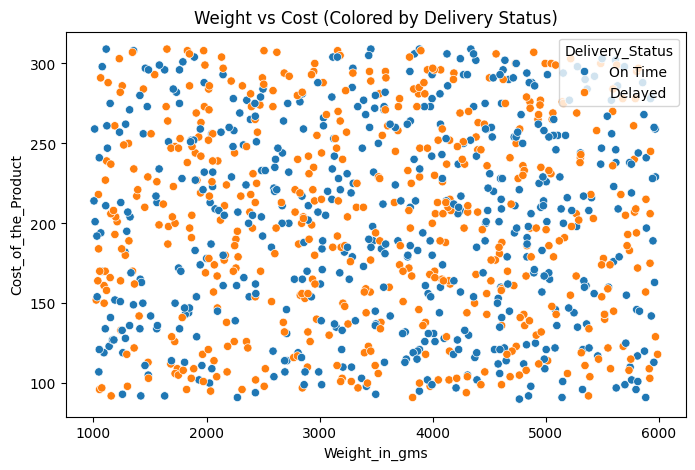

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Weight_in_gms',
    y='Cost_of_the_Product',
    hue='Delivery_Status',
    data=df
)
plt.title("Weight vs Cost (Colored by Delivery Status)")
plt.show()


In [17]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    print(f"{col} Skewness:", df[col].skew())


ID Skewness: 0.0
Customer_care_calls Skewness: -0.028389006032033468
Customer_rating Skewness: 0.027258196238634992
Cost_of_the_Product Skewness: -0.020104832239605342
Prior_purchases Skewness: -0.016479090177694552
Discount_offered Skewness: 0.035433756255561305
Weight_in_gms Skewness: -0.05898565460773562
Reached.on.Time_Y.N Skewness: -0.020031059191976838
Cost_per_gram Skewness: 1.6214701499467088


In [18]:
df.groupby('Delivery_Status').agg({
    'Discount_offered':['mean','median','max'],
    'Weight_in_gms':['mean','median','max'],
    'Cost_of_the_Product':['mean','median','max']
})


Discount_offered            Weight_in_gms                \
                            mean median max          mean  median   max   
Delivery_Status                                                           
Delayed                31.577778   31.0  64   3420.385859  3423.0  5988   
On Time                32.388119   34.0  64   3580.835644  3734.0  5969   

                Cost_of_the_Product              
                               mean median  max  
Delivery_Status                                  
Delayed                  201.361616  202.0  309  
On Time                  199.291089  204.0  309

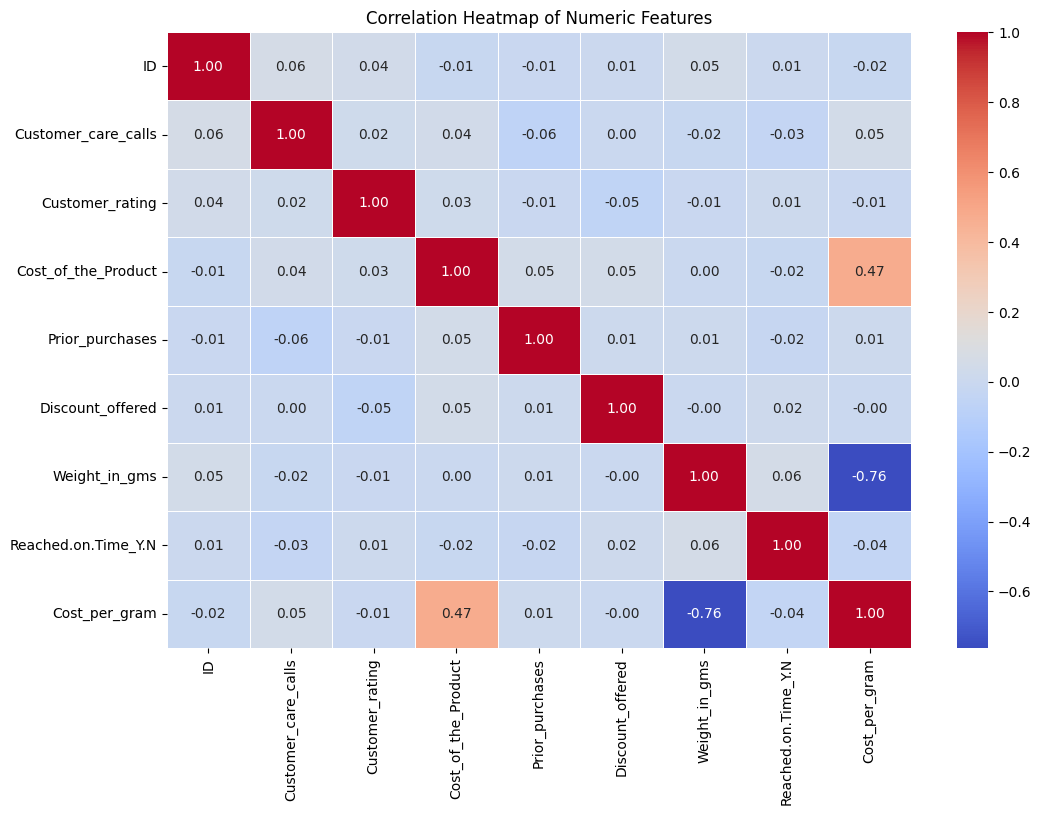

In [19]:
plt.figure(figsize=(12,8))

corr_matrix = df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


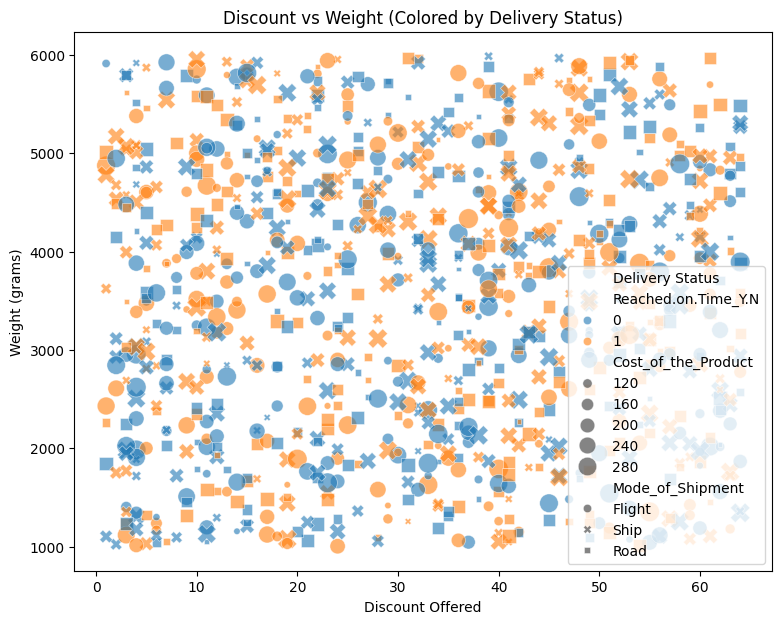

In [20]:
plt.figure(figsize=(9,7))

sns.scatterplot(
    x='Discount_offered',
    y='Weight_in_gms',
    hue='Reached.on.Time_Y.N',
    style='Mode_of_Shipment',   
    size='Cost_of_the_Product', 
    sizes=(20,200),
    alpha=0.6,
    data=df
)

plt.title("Discount vs Weight (Colored by Delivery Status)")
plt.xlabel("Discount Offered")
plt.ylabel("Weight (grams)")
plt.legend(title="Delivery Status")
plt.show()
